In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.misc
from scipy import ndimage
from skimage.measure import compare_psnr as psnr
from skimage.measure import compare_ssim as ssim

In [3]:
img1 = cv2.imread("eight.tif",0)
row1 = img1.shape[0]
col1 = img1.shape[1]

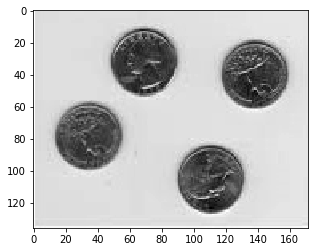

In [4]:
plt.imshow(img1,cmap = 'gray')

In [5]:
noisy = img1 + 0.8 * img1.std() * np.random.random(img1.shape)

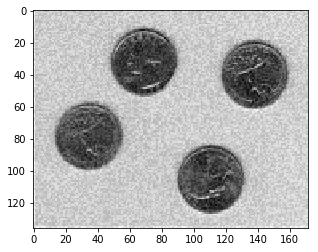

In [6]:
plt.imshow(noisy,cmap = 'gray')

In [7]:
mask_size = 3
mean_kernel = np.ones(mask_size ** 2).reshape(mask_size, mask_size) 

In [8]:
def conv_op(img, kernel, x, y, cen_x, cen_y, op):
    m, n = kernel.shape
    ans = 0
    
    if op == 'median':
        ans = []
    for ind1, i in enumerate(range(x, x + m)):
        for ind2, j in enumerate(range(y, y + n)):
            if i >= 0 and i < img.shape[0] and j >= 0 and j < img.shape[1]:
                if op == 'mean':
                    ans += img[i, j] * kernel[ind1, ind2]
                elif op == 'max':
                    ans = max(ans, img[i, j])
                elif op == 'min':
                    ans = min(ans, img[i, j])
                else:
                    ans.append(img[i, j])
                    
    if op == 'median':
        ans.sort()
        return ans[len(ans) // 2]
    return ans

In [9]:
def apply_mask(img, kernel, kernel_point, op):
    new_img = np.zeros(img.shape)
    center_x, center_y = kernel_point
    m, n = img.shape
    for i in range(m):
        for j in range(n):
            new_img[i, j] = conv_op(img, kernel, i - center_x, j - center_y, center_x, center_y, op)
    return new_img

**MEAN FILTERING**

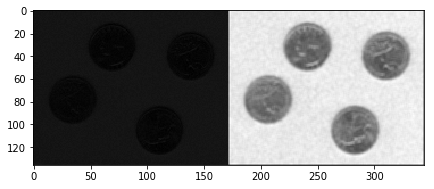

In [10]:
recovered_img = apply_mask(noisy.copy(), mean_kernel, (mask_size // 2, mask_size // 2), 'mean')
plt.figure(figsize = (7, 4))
plt.imshow(np.hstack((noisy, recovered_img)), cmap = 'gray')

In [11]:
psnr(noisy.astype(int), recovered_img.astype(int))


121.60211466609726

In [12]:
ssim( recovered_img.astype(int), noisy.astype(int))

0.999999998286871

**MEDIAN FILTERING**

In [13]:
recovered_img1 = apply_mask(noisy.copy(), mean_kernel, (mask_size // 2, mask_size // 2), 'median')

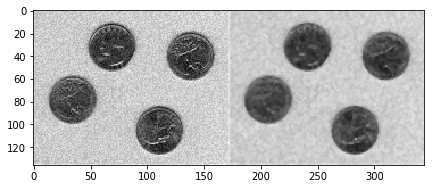

In [14]:
plt.figure(figsize = (7,4))
plt.imshow(np.hstack((noisy, recovered_img1)), cmap = 'gray')

In [15]:
psnr(noisy.astype(int), recovered_img1.astype(int))

163.61119563208615

In [16]:
ssim(noisy.astype(int), recovered_img1.astype(int))

0.9999999999999861

**MAX FILTERING**

In [17]:
recovered_img2 = apply_mask(noisy.copy(), mean_kernel, (mask_size // 2, mask_size // 2), 'max')

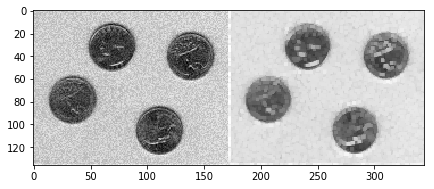

In [18]:
plt.figure(figsize = (7,4))
plt.imshow(np.hstack((noisy, recovered_img2)), cmap = 'gray')

In [19]:
psnr(noisy.astype(int), recovered_img2.astype(int))

156.96815728010034

In [20]:
ssim(noisy.astype(int), recovered_img2.astype(int))

0.9999999999996397

**MIN FILTERING**

In [21]:
recovered_img3 = apply_mask(noisy.copy(), mean_kernel, (mask_size // 2, mask_size // 2), 'min')

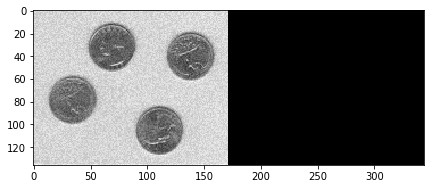

In [22]:
plt.figure(figsize = (7,4))
plt.imshow(np.hstack((noisy, recovered_img3)), cmap = 'gray')

In [23]:
psnr(noisy.astype(int), recovered_img3.astype(int))

139.56514291262343

In [24]:
ssim(noisy.astype(int), recovered_img3.astype(int))

0.9999999999732198

In [27]:
import numpy as np
import PIL as Image
import cv2
from skimage.util import random_noise

def adaptive(img,kernel):
    output=np.zeros((256,256),dtype='uint8')
    kernel_row,kernel_col=kernel.shape
    image_row,image_col=img.shape
    start_row=int(kernel_row/2)
    end_row=image_row-start_row-1
    start_col=int(kernel_col/2)
    end_col=image_col-start_col-1

    for i in range(start_row,end_row):
        for j in range(start_col,end_col):
            arr = []
            for k in range(-1,2):
                for l in range(-1,2):
                    
                    arr.append(img[i+k][j+l])
            arr.sort()
            if(img[i][j]>arr[0] and img[i][j]<arr[8]):
                output[i][j]=img[i][j]
            else:
                output[i][j]=arr[4]
    return output
    


img = cv2.imread("cameraman.tif",0)
print(img.shape)
noise_image = random_noise(img,mode='s&p',amount=0.05)
mask = np.array([[1,1,1],[1,1,1],[1,1,1]])


noisy_image=np.zeros((256,256),dtype='uint8')
for i in range(noisy_image.shape[0]):
    for j in range(noisy_image.shape[1]):
        noisy_image[i][j] = noise_image[i][j]*255
filtered_img = adaptive(noisy_image,mask)
cv2.imshow('noisy_img',noise_image)
cv2.waitKey(0)
cv2.imshow('filtered_img',filtered_img)
cv2.waitKey(0)

(256, 256)


-1